In [ ]:
import pandas as pd 
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import warnings


data = pd.read_csv("/content/course2.txt", delimiter = ',') #reading the data from a text file
df = pd.DataFrame(data) 
courses = df['Course'].unique()
n = len(courses)
print(f"Courses:{courses} Distinct:{n}")
sem = df['Sem'].unique()
s = len(sem)
print(f"\nSem:{sem} Distinct:{s}")
subjects={}
i=0
#adding items in subjects dictionary with subject and a corresponding number
for s1,s2,s3,s4,s5,s6 in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5'],df['Sub6']):
    if s1 not in subjects and s1 == s1:
        subjects.update({s1:i})
        i=i+1
    elif s2 not in subjects and s2 == s2:
        subjects.update({s2:i})
        i=i+1
    elif s3 not in subjects and s3 == s3:
        subjects.update({s3:i})
        i=i+1
    elif s4 not in subjects and s4 == s4:
        subjects.update({s4:i})
        i=i+1
    elif s5 not in subjects and s5 == s5:
        subjects.update({s5:i})
        i=i+1
    elif s6 not in subjects and s6 == s6:
        subjects.update({s6:i})
        i=i+1
print("\nTotal Number of subject is:",len(subjects))

matrix = [[0 for i in range(len(subjects))] for j in range(s*n)]#initalizing matrix
for s1,s2,s3,s4,s5,s6,sem,course in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5'],
                                        df['Sub6'],df['Sem'],df['Course']):
    if course == 'ISE':
        sem = sem +3
    if s1 == s1:
        matrix[sem-1][subjects[s1]]=1
    if s2 == s2:
        matrix[sem-1][subjects[s2]]=1
    if s3 == s3:
        matrix[sem-1][subjects[s3]]=1
    if s4 == s4:
        matrix[sem-1][subjects[s4]]=1
    if s5 == s5:
        matrix[sem-1][subjects[s5]]=1
    if s6 == s6:
        matrix[sem-1][subjects[s6]]=1

Student_mat=pd.DataFrame(matrix, columns=subjects.keys())
print("\n\nList of Subject semester wise:")
Student_mat

Courses:['CSE' 'ISE'] Distinct:2

Sem:[1 2 3] Distinct:3

Total Number of subject is: 18


List of Subject semester wise:


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0
5,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1


In [ ]:
#creating a new dictionary with key:value (number:subject) of subjects  pairs reversed
reverse = dict(zip(subjects.values(),subjects.keys())) 
color_subjects={}  #dictionary for subject:colour-index pairs
datesheet=[[]]
CompleteGraph = nx.Graph() #graph for all semesters

# course 1-CSE


Complete Graph for Subject of Sem  1 :
['A', 'B', 'C', 'D']
{'A': 0, 'B': 1, 'C': 2, 'D': 3} 



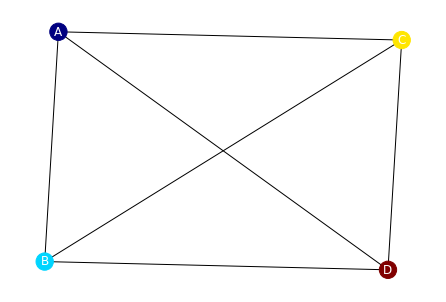


Complete Graph for Subject of Sem  2 :
['A', 'B', 'E', 'F', 'G', 'H']
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 2, 'F': 3, 'G': 4, 'H': 5} 



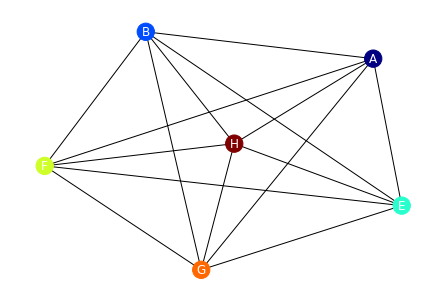


Complete Graph for Subject of Sem  3 :
['A', 'B', 'H', 'I', 'J', 'K', 'L']
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 2, 'J': 3, 'K': 4, 'L': 6} 



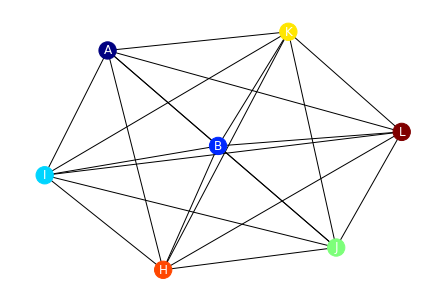

In [ ]:
for i in range(0,s):
    sub=[]          #sub contains subjects for a given sem
    G = nx.Graph()  #graph for a given semester
    
    for j in range(0,len(subjects)):
        if matrix[i][j]==1:
            sub.append(reverse[j]) #sem wise subject list
    datesheet.append(sub)

    #removing colors that have been used
    chromatic=[0,1,2,3,4,5,6]
    for y in range(0,i):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]])  

    index=0 #allocating the colors for the subjects
    for subject in range(0,len(sub)):
        if sub[subject] not in color_subjects.keys():
            color_subjects.update({sub[subject]:chromatic[index]})
            index=index+1 

    print("\nComplete Graph for Subject of Sem ",(i)%3 +1,":")
    print(sub)
    print(color_subjects,"\n")

    G.add_nodes_from(sub)                            #adding the subjects as the nodes
    G.add_edges_from(itertools.combinations(sub, 2)) #adding the edges between all the nodes

    CompleteGraph.add_nodes_from(sub)                #adding the edges and the vertices to the complete graph
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2), weight =8)
 
    values = [color_subjects.get(node,0.25) for node in G.nodes()]
    nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values, with_labels=True, font_color='white')
    plt.show()

Graph for All Subjects in course 1


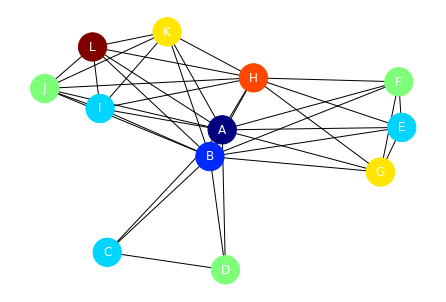

In [ ]:
print("Graph for All Subjects in course 1")
values = [color_subjects.get(node,0.25) for node in CompleteGraph.nodes()]
nx.draw(CompleteGraph, node_size=800, cmap=plt.get_cmap('jet'), node_color=values, with_labels=True, font_color='white')
nx.draw
plt.show()

# course 2-ISE


 Complete Graph for Subject of Sem  1 :
['A', 'B', 'M', 'N']
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 2, 'J': 3, 'K': 4, 'L': 6, 'M': 4, 'N': 5} 



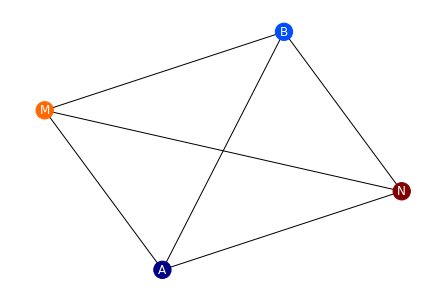


 Complete Graph for Subject of Sem  2 :
['A', 'B', 'E', 'F', 'M', 'O', 'P']
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 2, 'J': 3, 'K': 4, 'L': 6, 'M': 4, 'N': 5, 'O': 5, 'P': 6} 



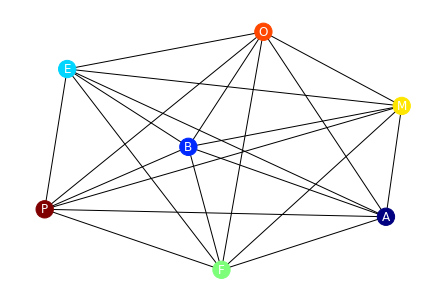


 Complete Graph for Subject of Sem  3 :
['B', 'I', 'J', 'O', 'P', 'Q', 'R']
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 2, 'J': 3, 'K': 4, 'L': 6, 'M': 4, 'N': 5, 'O': 5, 'P': 6, 'Q': 0, 'R': 4} 



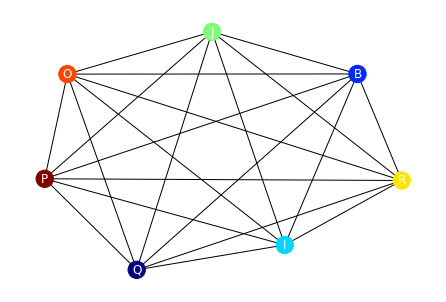

In [ ]:
for i in range(s,n*s):
    sub=[]
    G = nx.Graph()

    for j in range(0,len(subjects)):
        if matrix[i][j]==1:
            sub.append(reverse[j]) #sem wise subject list
    datesheet.append(sub)          #sub contains sub in each sem
    
    #removing colors that have been used
    chromatic=[0,1,2,3,4,5,6]
    for y in range(0,i): #checking for subjects that have already been alloted colors previously
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]])
   
    for y in range(i+1,s*n): #checking for subjects that will appear in remaining sems to better optimise the coloring
        for z in range(0,len(subjects)): 
            if matrix[y][z] == 1 and reverse[z] in color_subjects.keys() and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]]) 

    index=0
    for subject in range(0,len(sub)): #allocating the colors for the subjects
        if sub[subject] not in color_subjects.keys():
            color_subjects.update({sub[subject]:chromatic[index]})
            index=index+1

    print("\n Complete Graph for Subject of Sem ",(i)%3 +1,":")
    print(sub)
    print(color_subjects,"\n")

    G.add_nodes_from(sub)                            #adding the subjects as the nodes
    G.add_edges_from(itertools.combinations(sub, 2)) #adding the edges between all the nodes

    CompleteGraph.add_nodes_from(sub)   #adding the edges and the vertices to the complete graph
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2),weight=8)
    
    values = [color_subjects.get(node,0.25) for node in G.nodes()]
    nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values, with_labels=True, font_color='white')
    plt.show()

Graph for All Subjects


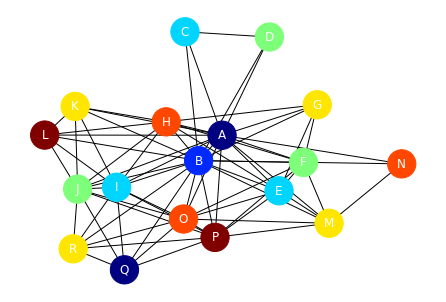

In [ ]:
print("Graph for All Subjects")
values = [color_subjects.get(node,0.25) for node in CompleteGraph.nodes()]
nx.draw(CompleteGraph, node_size=800, cmap=plt.get_cmap('jet'), node_color=values, with_labels=True, font_color='white')
nx.draw
plt.show()

In [ ]:
print("Colors alloted to Each Subject")
for i,j in zip(color_subjects.keys(),color_subjects.values()):
    print(i,"-",j)

Colors alloted to Each Subject
A - 0
B - 1
C - 2
D - 3
E - 2
F - 3
G - 4
H - 5
I - 2
J - 3
K - 4
L - 6
M - 4
N - 5
O - 5
P - 6
Q - 0
R - 4


In [ ]:
data=np.chararray((6,9),unicode=True)
for i in range(0,n*s):
    for j in range(0,len(subjects)):
        if matrix[i][j] is 1:
            data[i][2+color_subjects[reverse[j]]]=str(reverse[j])
final = pd.DataFrame(data, columns = ['Course','Sem', 'Slot1','Slot2','Slot3','Slot4','Slot5','Slot6','Slot7'])
for i in range(0,n*s):
    if i < s:
        final.at[i,'Course']=(df['Course'].unique()[0])
    else:
        final.at[i,'Course']=(df['Course'].unique()[1])
    final.at[i,'Sem']=(df['Sem'].unique()[(i)%s])

print("\nFinal Schedule For Each Semester:")
final


Final Schedule For Each Semester:


,Course,Sem,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6,Slot7
0,CSE,1,A,B,C,D,,,
1,CSE,2,A,B,E,F,G,H,
2,CSE,3,A,B,I,J,K,H,L
3,ISE,1,A,B,,,M,N,
4,ISE,2,A,B,E,F,M,O,P
5,ISE,3,Q,B,I,J,R,O,P
